In [142]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from tmu.models.autoencoder.autoencoder import TMAutoEncoder

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [143]:
def load_test_dataset(farm, event_id):
    X = np.loadtxt(f"./data_test/X_{farm}_{event_id}.txt", dtype=np.uint32)
    X = np.array(X).astype(np.uint32)
    return X


def load_test_labels(farm, event_id):
    y = np.loadtxt(f"./data_test/y_{farm}_{event_id}.txt", dtype=np.uint32)
    y = np.array(y).astype(np.uint32)
    return y

In [144]:
def load_model(filename) -> TMAutoEncoder:
    with open(filename, "rb") as f:
        model = pickle.load(f)

    return model

In [145]:
def calculate_accuracy(labels, predictions):
    # Calculate the accuracy
    accuracy = np.sum(labels == predictions) / len(labels)

    return accuracy

In [146]:
def reconstruction_accuracy(X, pred):
    correct = np.sum(X == pred)
    accuracy = correct / len(X)
    return accuracy


def calculate_loss(X, pred):
    # For each value of X, if the value is the same as the prediction, then it is correct
    mse_loss = np.mean((X - pred) ** 2)
    return mse_loss


def hamming_loss(y_true, y_pred):
    return np.mean(y_true != y_pred)


def plot_mse(X, y, pred, name, threshold):
    # Compute MSE for each row
    mse_per_row = [reconstruction_accuracy(X[i], pred[i]) for i in range(len(X))]

    # Plot SNS plot of all MSE values
    plt.figure(figsize=(8, 4))
    sns.histplot(mse_per_row, bins=50, kde=True, color='b')

    # Add a threshold line
    plt.axvline(threshold, color='r', linestyle='--')

    # Save the plot
    plt.savefig(f"./plot_mse_hist_{name}.png")


def run_test(X, y, name):
    print(f"Experiment: {name}")
    print(f"Rows: {len(X)}, Columns: {len(X[0])}")

    tm = load_model("run2/latest_24.pkl")

    pred = tm.predict(X)

    threshold = 0.75

    # For each row in pred, if the MSE is greater than the threshold, then it is an anomaly
    reconstruction_accuracies = [reconstruction_accuracy(X[i], pred[i]) for i in range(len(X))]
    losses = [calculate_accuracy(X[i], pred[i]) for i in range(len(X))]

    # Print average reconstruction accuracy
    print(f"Average Reconstruction Loss: {np.mean(reconstruction_accuracies)}")
    print(f"Average Loss: {np.mean(losses)}")

    X_predictions = np.array([1 if losses[i] < threshold else 0 for i in range(len(X))])

    # Accuracy
    accuracy = calculate_accuracy(y, X_predictions)

    print(f"Accuracy: {accuracy}")

    plot_mse(X, y, pred, name, threshold=threshold)

In [147]:
test_datasets = [34, 7, 53, 27, 19, 77]


def run_tests(farm, dataset):
    name = f"{farm}_{dataset}"

    X_test = load_test_dataset(farm, dataset)
    y_test = load_test_labels(farm, dataset)

    run_test(X_test, y_test, name)

Experiment: B_34
Rows: 56564, Columns: 315
Average Reconstruction Loss: 0.8617235933338049
Average Loss: 0.8617235933338049
Accuracy: 0.8153595926737854
Experiment: B_7
Rows: 57888, Columns: 315
Average Reconstruction Loss: 0.899872879868734
Average Loss: 0.899872879868734
Accuracy: 0.8885261194029851
Experiment: B_53
Rows: 58607, Columns: 315
Average Reconstruction Loss: 0.8800703421038878
Average Loss: 0.8800703421038878
Accuracy: 0.8414353234255294
Experiment: B_27
Rows: 62268, Columns: 315
Average Reconstruction Loss: 0.8836163394074362
Average Loss: 0.8836163394074362
Accuracy: 0.7967977131110683
Experiment: B_19
Rows: 56274, Columns: 315
Average Reconstruction Loss: 0.8837904786726625
Average Loss: 0.8837904786726625
Accuracy: 0.8957422610797171
Experiment: B_77
Rows: 61776, Columns: 315
Average Reconstruction Loss: 0.868066347233014
Average Loss: 0.868066347233014
Accuracy: 0.8126618751618752


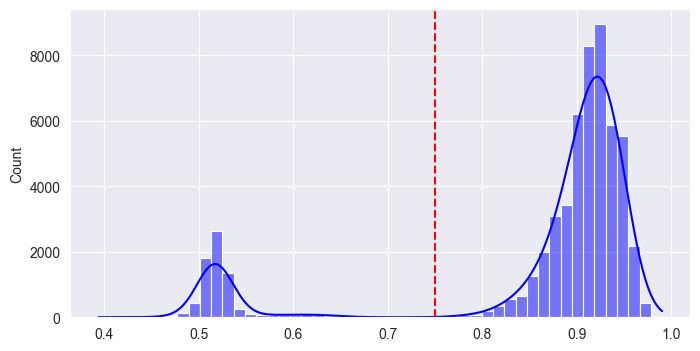

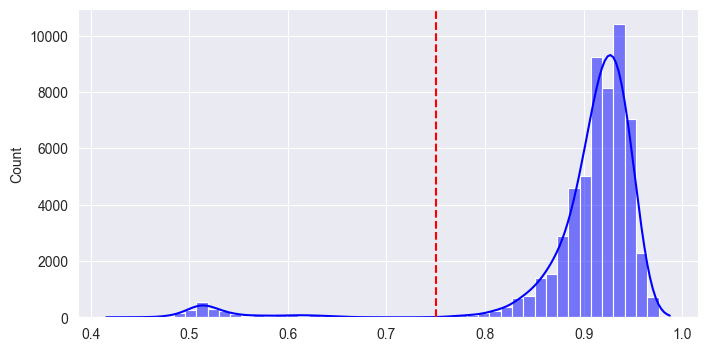

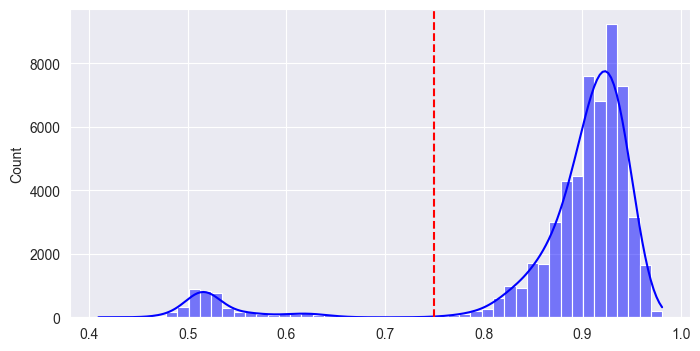

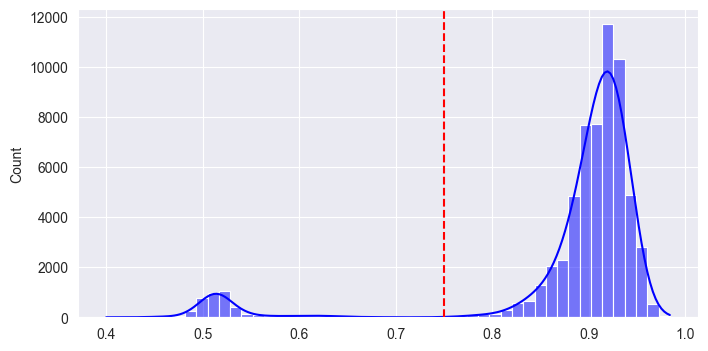

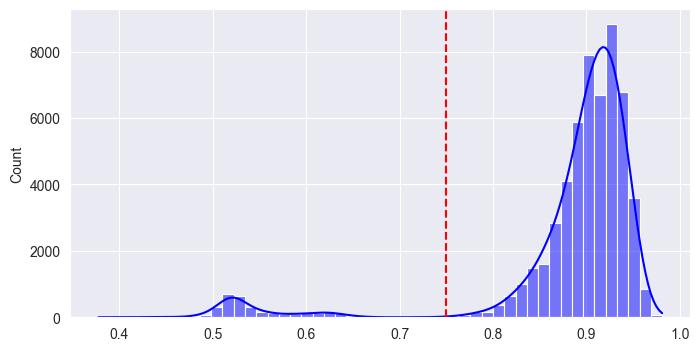

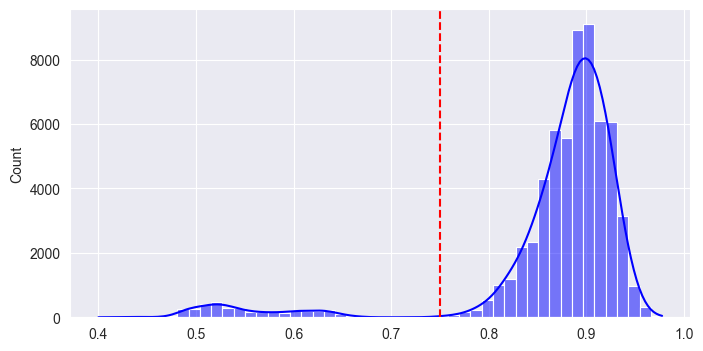

In [149]:
for set in test_datasets:
    run_tests("B", set)